In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\start\\bank-additional\\bank-additional.csv", delimiter=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
#renamed y to deposit
df.rename(columns={"y":"Deposit"}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
#handling duplicate values
df.duplicated().sum()

0

In [7]:
#handling null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Deposit           0
dtype: int64

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


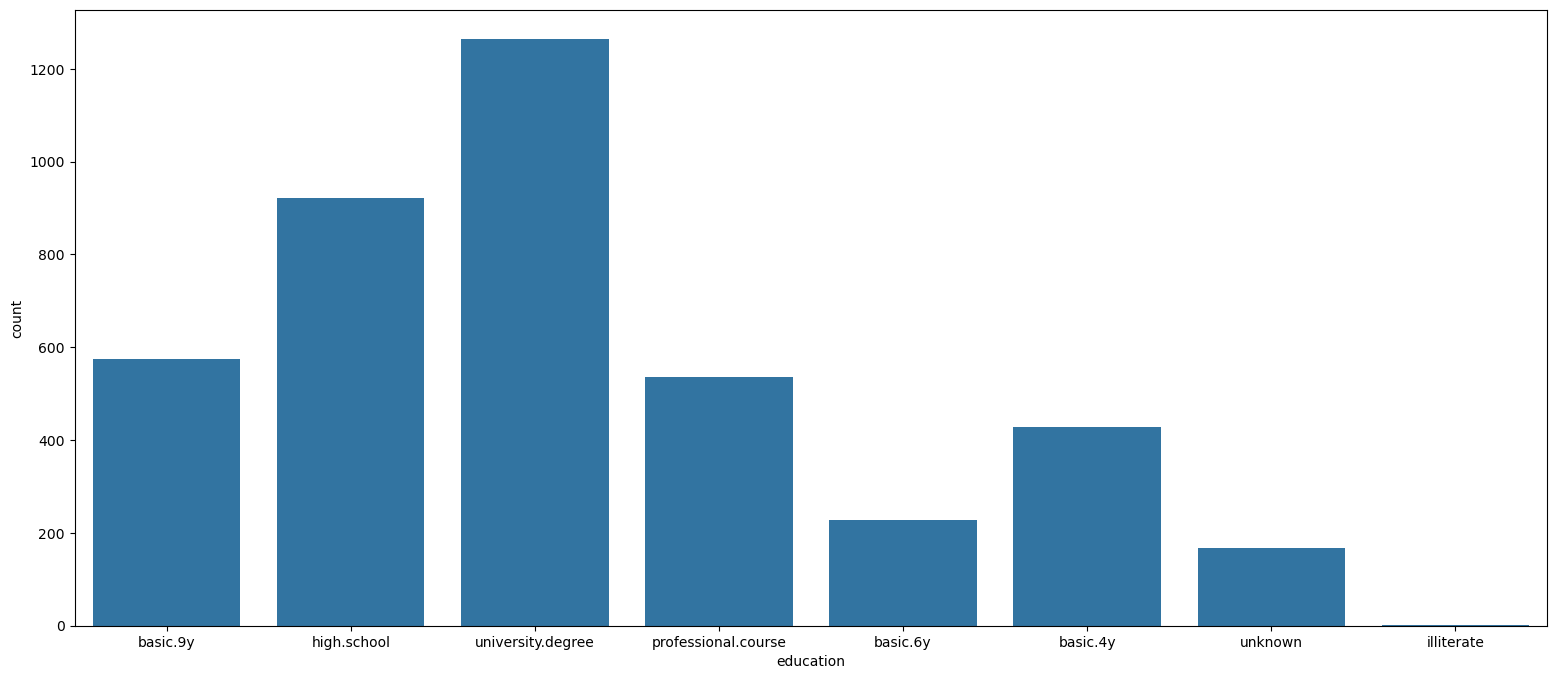

In [10]:
plt.figure(figsize=(19,8))
ax=sns.countplot(x=df["education"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_10224\1247202534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["age"])


<Axes: ylabel='Density'>

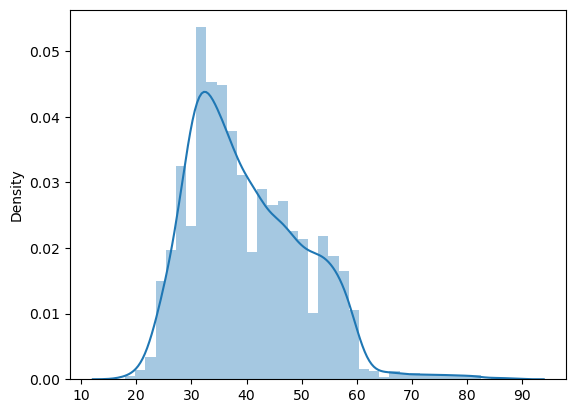

In [11]:
sns.distplot(x=df["age"])

In [12]:
# checking for correlation
df.select_dtypes(exclude=object).corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


<Axes: xlabel='campaign', ylabel='count'>

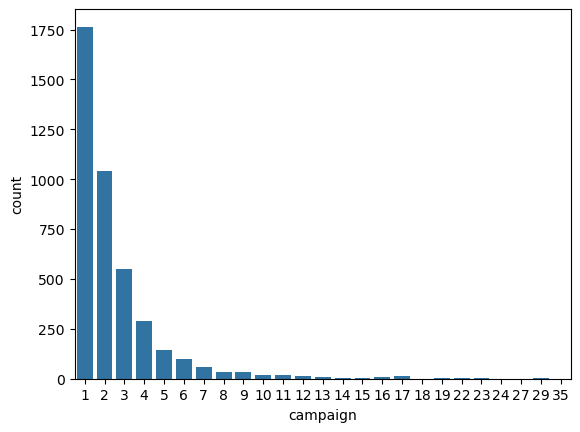

In [13]:
sns.countplot(x=df["campaign"])

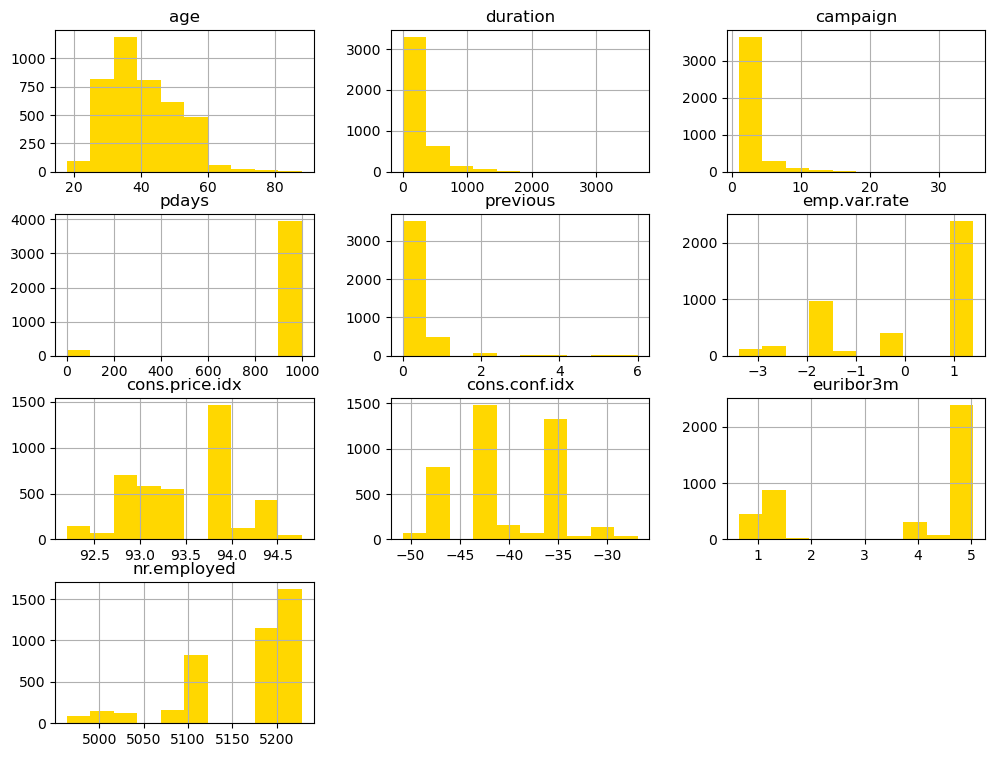

In [14]:
# we will text a new way to plot numerical and categorical distributions
df.hist(figsize=(12,9),color="gold")
plt.show()

In [15]:
#firstly lets extract the numerical and categorical columns
Cate_col= df.select_dtypes(include=object).columns
num_col=df.select_dtypes(exclude=object).columns

In [16]:
Cate_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Deposit'],
      dtype='object')

In [17]:
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_10224\1719896070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sx= sns.countplot(x=df[col], palette="dark")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10224\1719896070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sx= sns.countplot(x=df[col], palette="dark")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10224\1719896070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sx= sns.countplot(x=df[col], palette="dark")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10224\1719896070.py:4: FutureWarning: 

Passing `palette` without ass

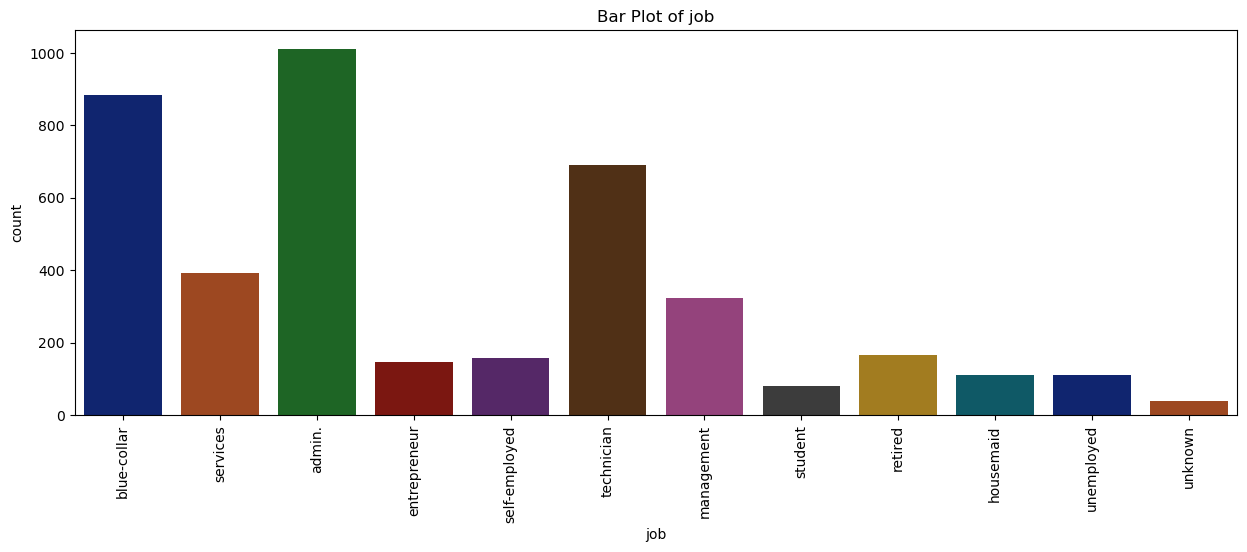

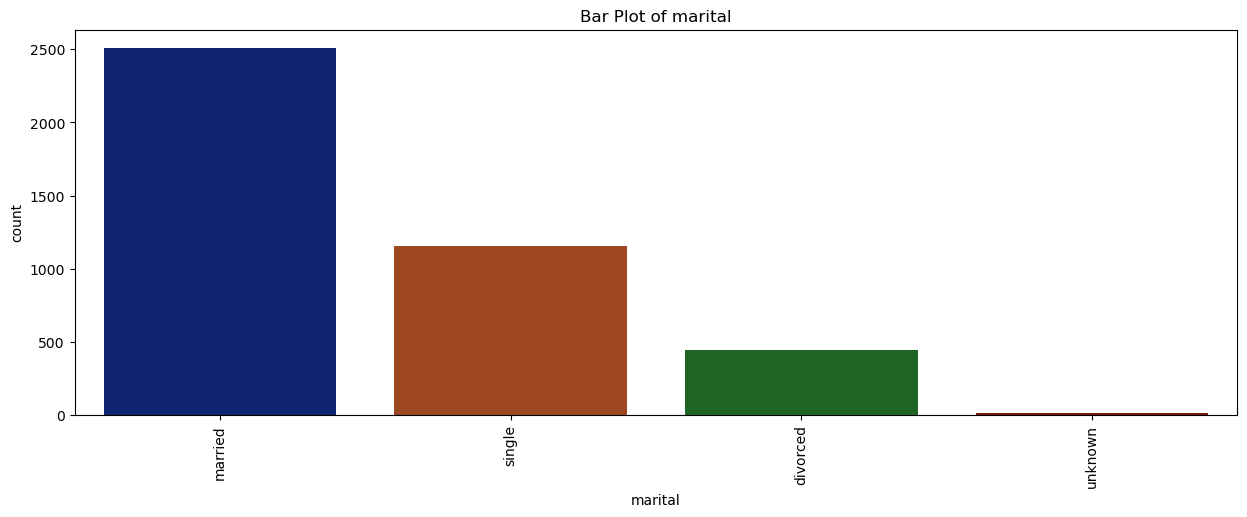

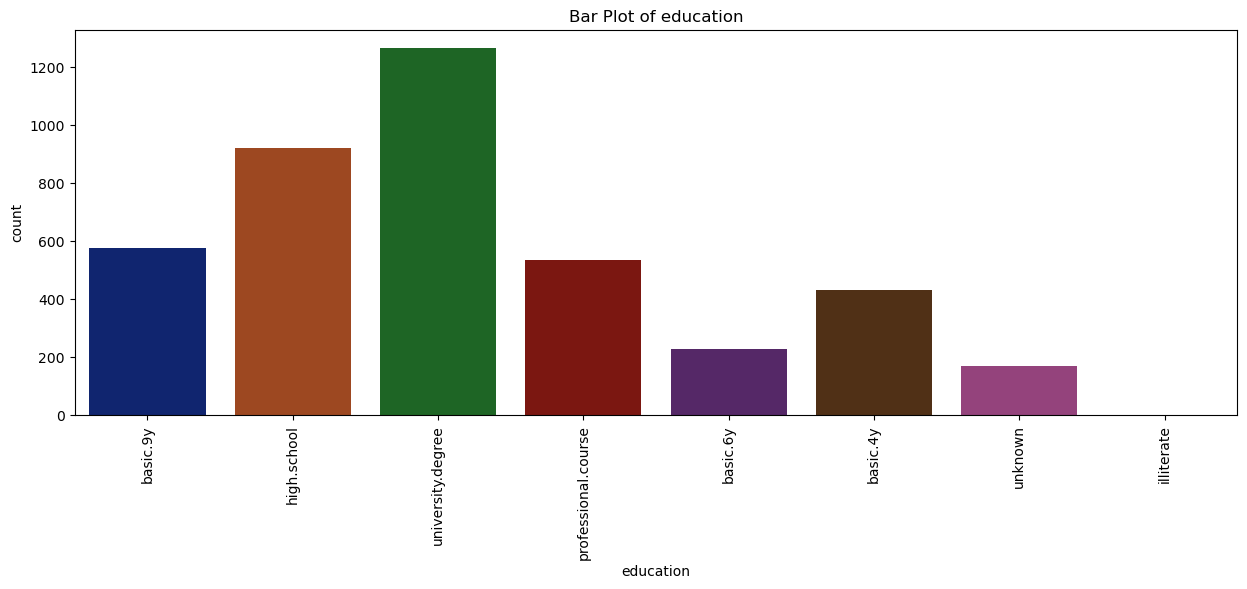

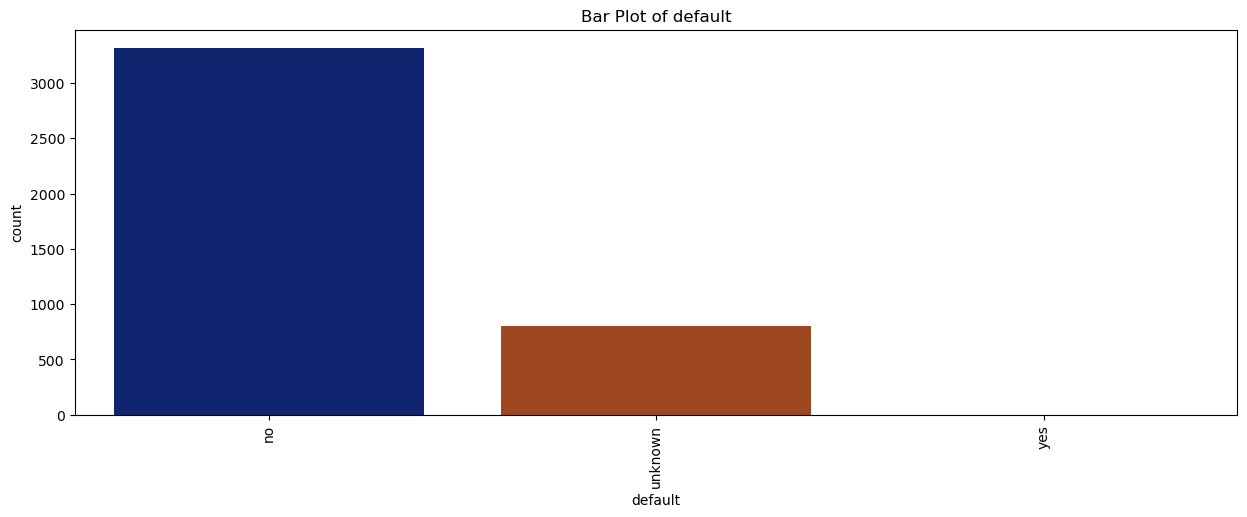

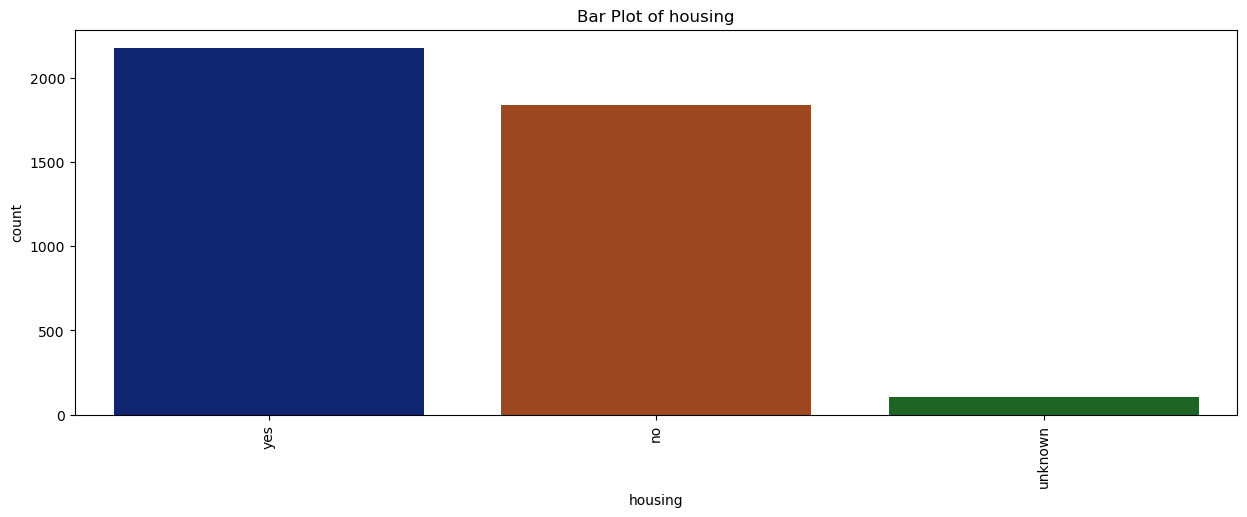

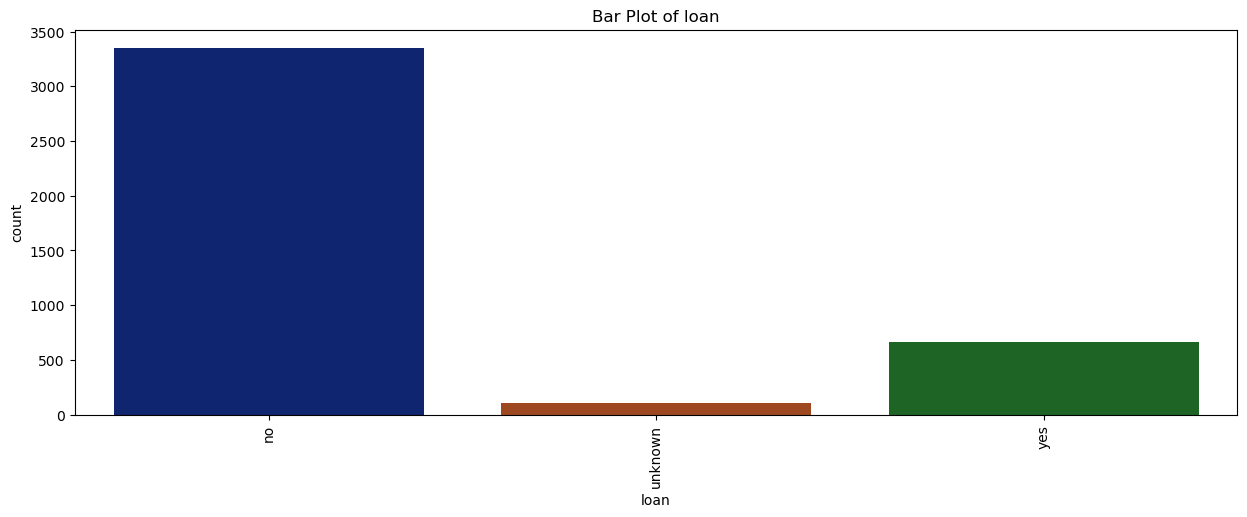

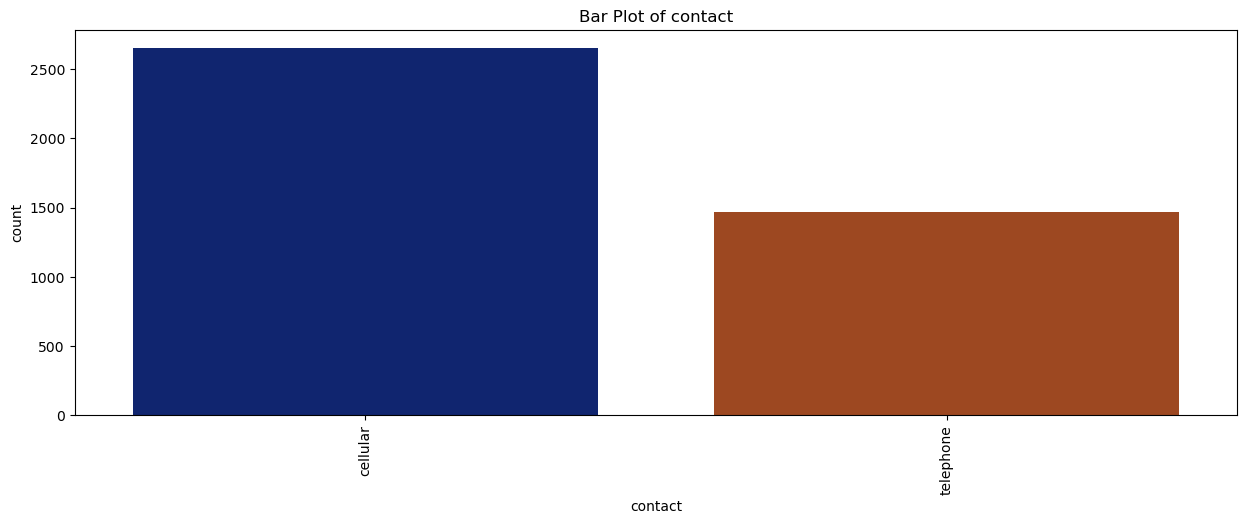

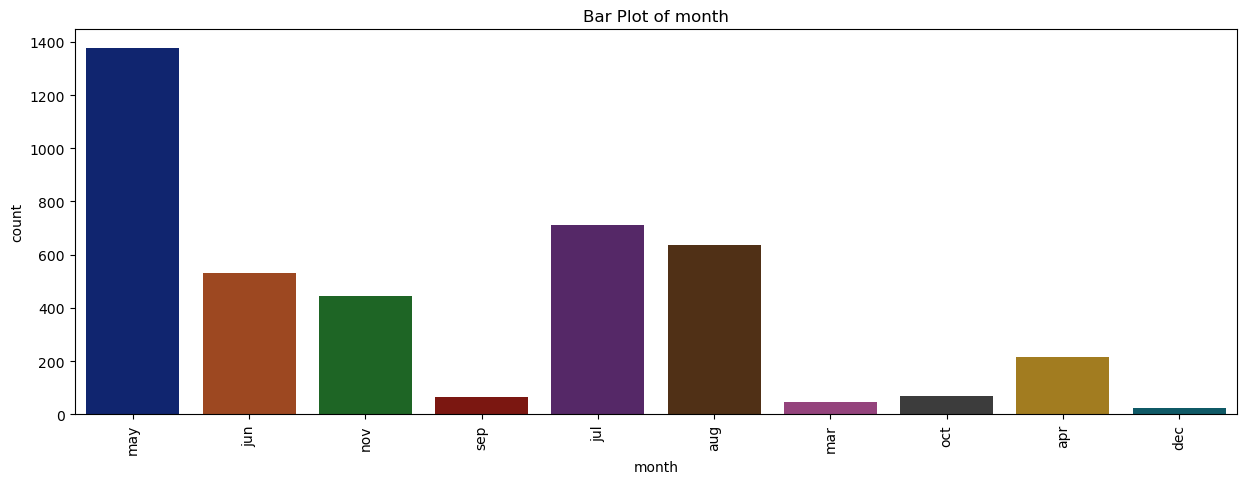

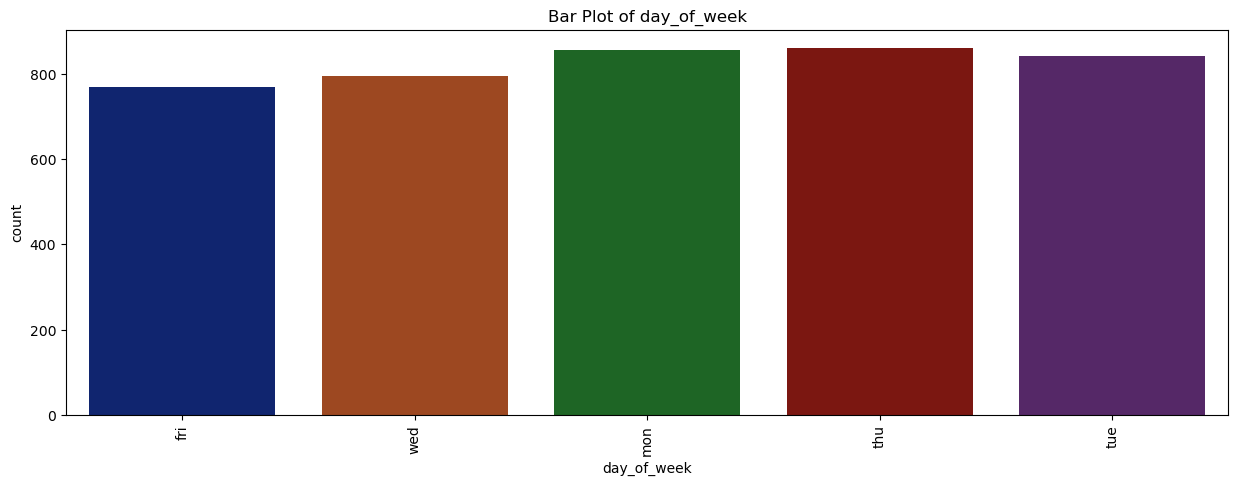

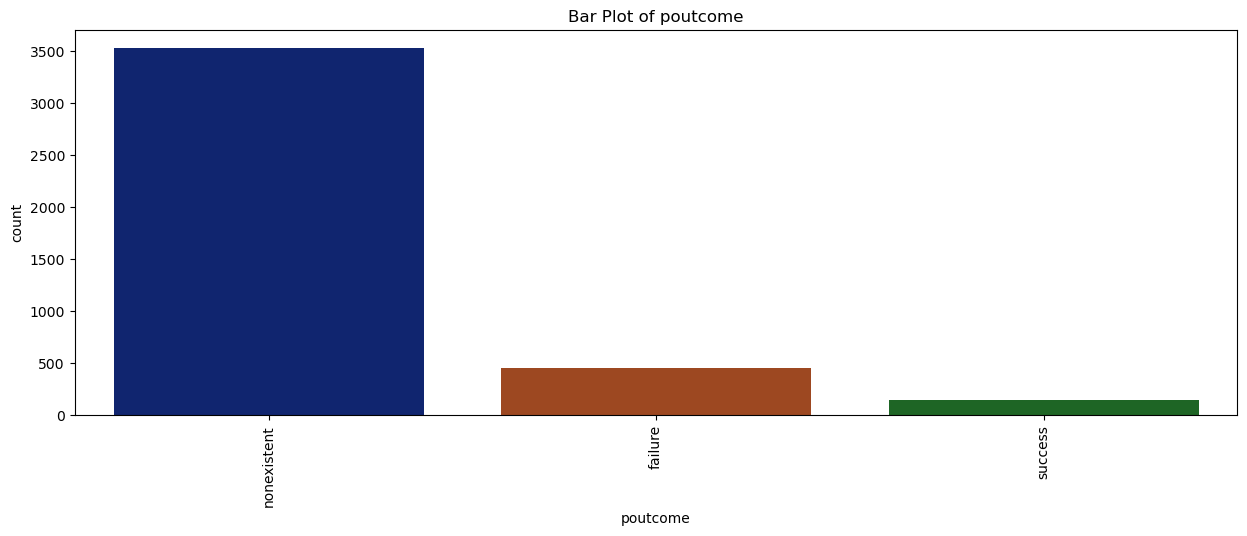

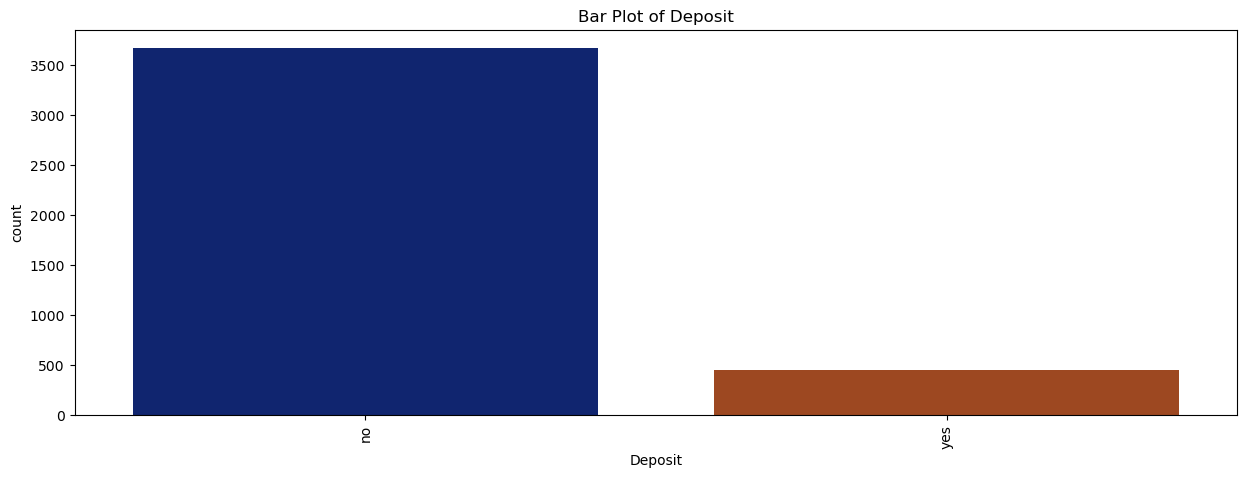

In [18]:
# for EDA with Categorical Columns
for col in Cate_col:
    plt.figure(figsize=(15,5))
    sx= sns.countplot(x=df[col], palette="dark")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title( f"Bar Plot of {col}")
    plt.xticks(rotation=90)
   

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

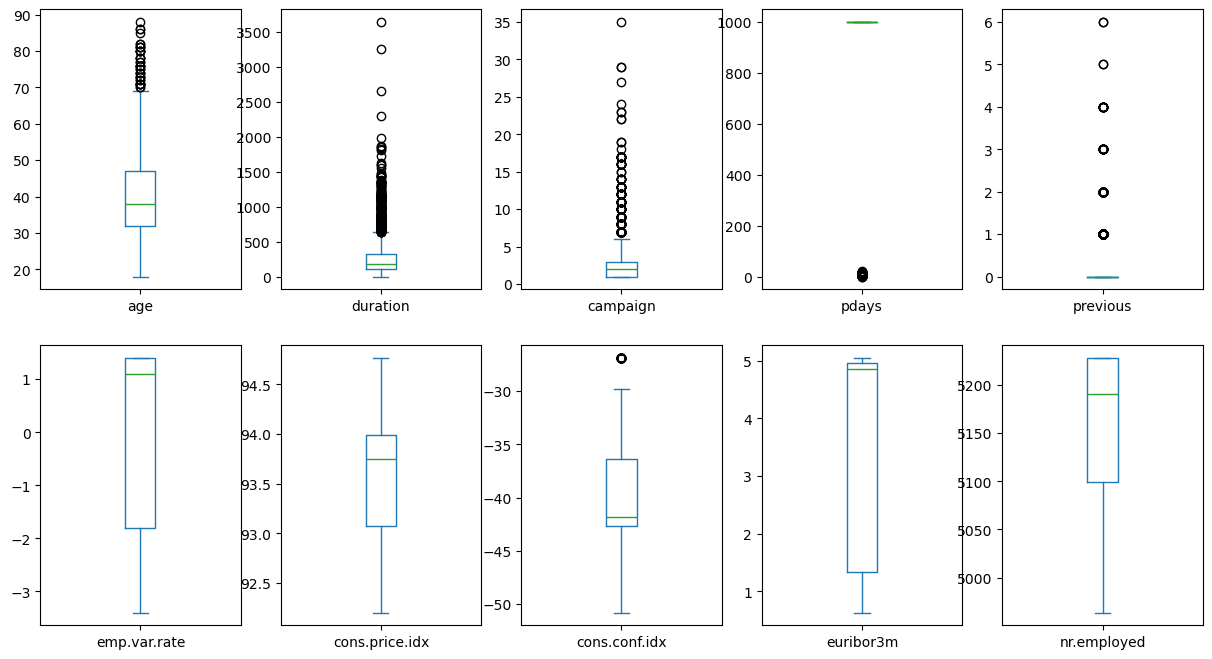

In [19]:
#checking for outliers
#lets use boxplots
df.plot(kind="box", subplots=True, layout=(2,5), figsize=(15,8))

In [20]:
# we can see a lot of outliers
df["pdays"].quantile(0.75)

999.0

In [21]:
#outliers for pdays
df["pdays"].value_counts()

pdays
999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: count, dtype: int64

In [22]:
df["previous"].quantile(0.75)

0.0

In [23]:
df["previous"].value_counts()

previous
0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: count, dtype: int64

In [24]:
#Dealing wth outliers using zscore for age, 
z_s=np.abs(stats.zscore(df["age"]))
#identify those whos zscore is greater than three
outliers=df[z_s > 3]
outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
42,76,retired,married,university.degree,no,no,no,cellular,aug,thu,...,1,999,1,failure,-1.7,94.027,-38.3,0.899,4991.6,no
128,75,retired,married,basic.4y,no,no,no,cellular,apr,tue,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,yes
150,82,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,...,3,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes
228,76,retired,single,basic.4y,no,no,no,cellular,nov,mon,...,4,6,1,success,-3.4,92.649,-30.1,0.715,5017.5,yes
338,81,retired,married,basic.4y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
450,73,retired,married,university.degree,no,yes,no,cellular,mar,fri,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,yes
537,74,retired,married,university.degree,no,no,no,telephone,oct,mon,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.977,4963.6,no
589,77,management,married,unknown,no,yes,no,cellular,aug,fri,...,1,3,6,success,-1.7,94.027,-38.3,0.905,4991.6,yes
696,86,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,...,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes
750,75,retired,married,university.degree,no,yes,no,cellular,jul,thu,...,1,999,2,failure,-1.7,94.215,-40.3,0.810,4991.6,yes


In [25]:
#Lets remove outliers in the columns
columns=df[["age","duration","campaign"]]
Q1= np.quantile(columns,0.25)
Q3= np.quantile(columns,0.75)
#calculate IQR for column height
IQR=Q3-Q1
LOW= Q1- (1.5*IQR)
HIGH= Q3 + (1.5*IQR)
df[["age","duration","campaign"]]= columns[(columns > LOW) & (columns < HIGH)]

In [26]:
print(IQR, LOW, HIGH)

100.0 -147.0 253.0


age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

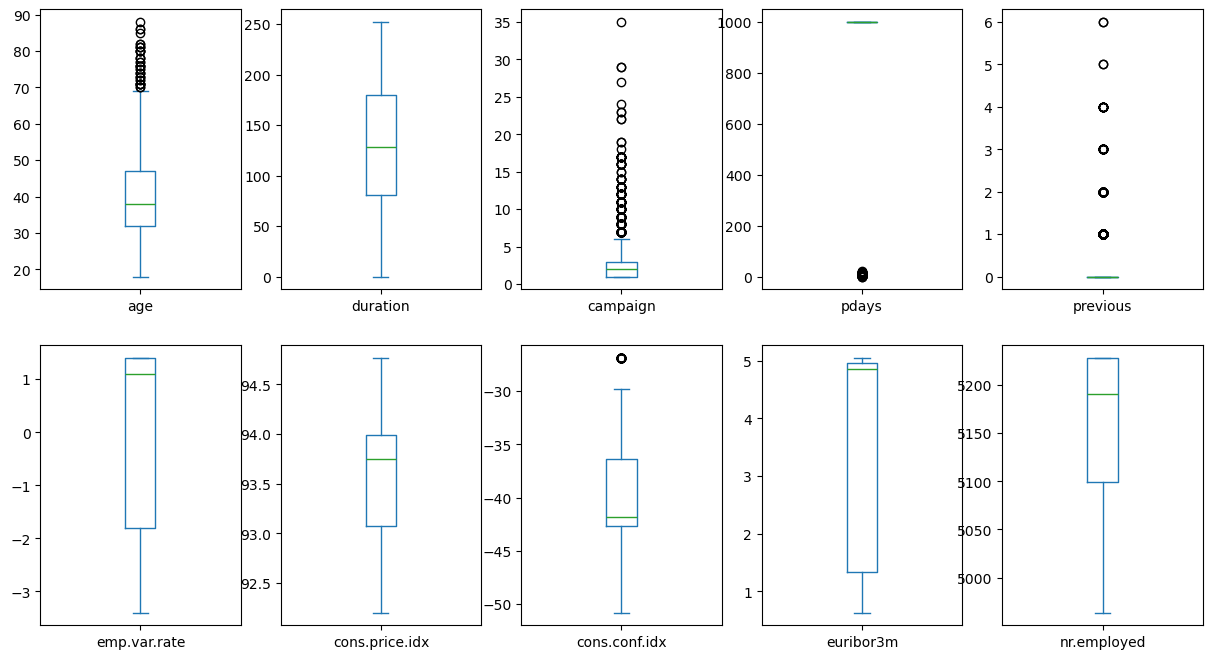

In [27]:
#plotting after removing outliers
df.plot(kind="box", subplots=True, layout=(2,5), figsize=(15,8))

<Axes: >

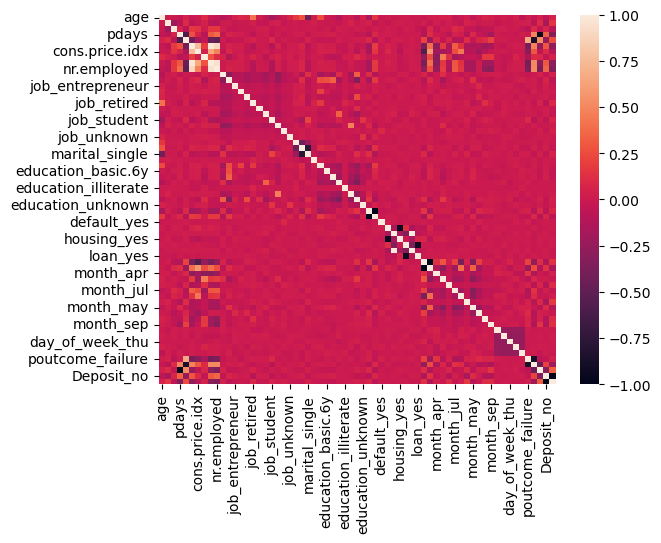

In [28]:
#check for multicollinearity
#use dummy variables for the categorical
df_encoded=pd.get_dummies(df)
corr= df_encoded.corr()

sns.heatmap(corr)

<Axes: >

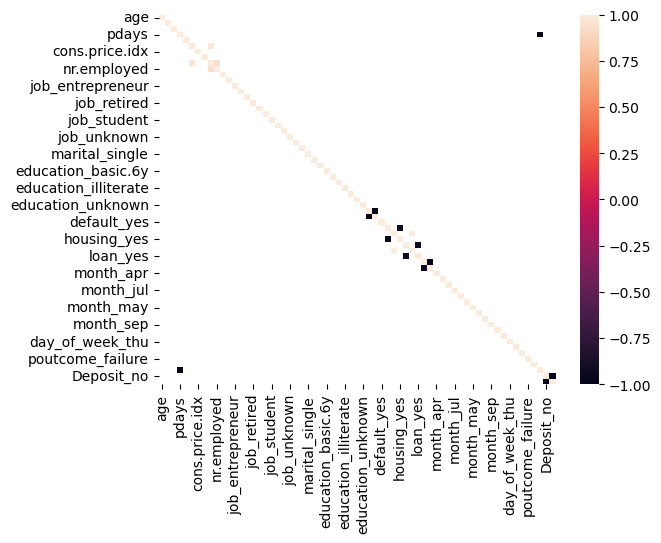

In [29]:
#to check for high correlation
high_corr= corr[abs(corr) >=0.9]
sns.heatmap(high_corr)

In [30]:
high_corr["euribor3m"].value_counts()

euribor3m
0.970308    1
1.000000    1
0.942589    1
Name: count, dtype: int64

In [31]:
high_corr["emp.var.rate"].value_counts()

emp.var.rate
1.000000    1
0.970308    1
Name: count, dtype: int64

In [32]:
df1=df
high_corcol= ['emp.var.rate','euribor3m','nr.employed']

In [33]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [34]:
df1.drop(high_corcol,axis=1, inplace=True)

In [35]:
df1.shape

(4119, 18)

In [36]:
#Label Encoding
Lb=LabelEncoder()

In [37]:
df_lencoded=df1.apply(Lb.fit_transform)

In [38]:
df_lencoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,Deposit
0,12,1,1,2,0,2,0,0,6,0,250,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,250,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,250,0,20,0,1,13,17,0


In [39]:
#after that lets coose our dependent and independent variables
#dependent variable
y=df_lencoded["Deposit"]
#independent variables
x=df_lencoded.drop(columns="Deposit")

In [40]:
df_lencoded["Deposit"].value_counts()

Deposit
0    3668
1     451
Name: count, dtype: int64

In [41]:
print(x.shape)
print(y.shape)

(4119, 17)
(4119,)


In [42]:
#splitting the train and testing data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [107]:
# the evaluation metrics for the classifier model
#i will create a functon that helps to do that
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
def Eval_model(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred)
    print(f"The Accuracy Score is {acc}")
    cm= confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix: {cm}")
    print(f"The Classification report:{classification_report(y_test,y_pred)}")

def modsc(model):
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("\n Training score/:",train_score)
    print("\n Test score:", test_score)
    


In [87]:
#Decision Tree Classifier
model_dt = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [97]:
modsc(model_dt)


 Training score/: 0.9161540951764325

 Test score: 0.903883495145631


In [103]:
ypred_model_dt= model_dt.predict(x_test)
print(ypred_model_dt)

[0 0 0 ... 0 0 0]


In [109]:
Eval_model(ypred_model_dt,y_test)

The Accuracy Score is 0.903883495145631
Confusion Matrix: [[911  89]
 [ 10  20]]
The Classification report:              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1000
           1       0.18      0.67      0.29        30

    accuracy                           0.90      1030
   macro avg       0.59      0.79      0.62      1030
weighted avg       0.97      0.90      0.93      1030



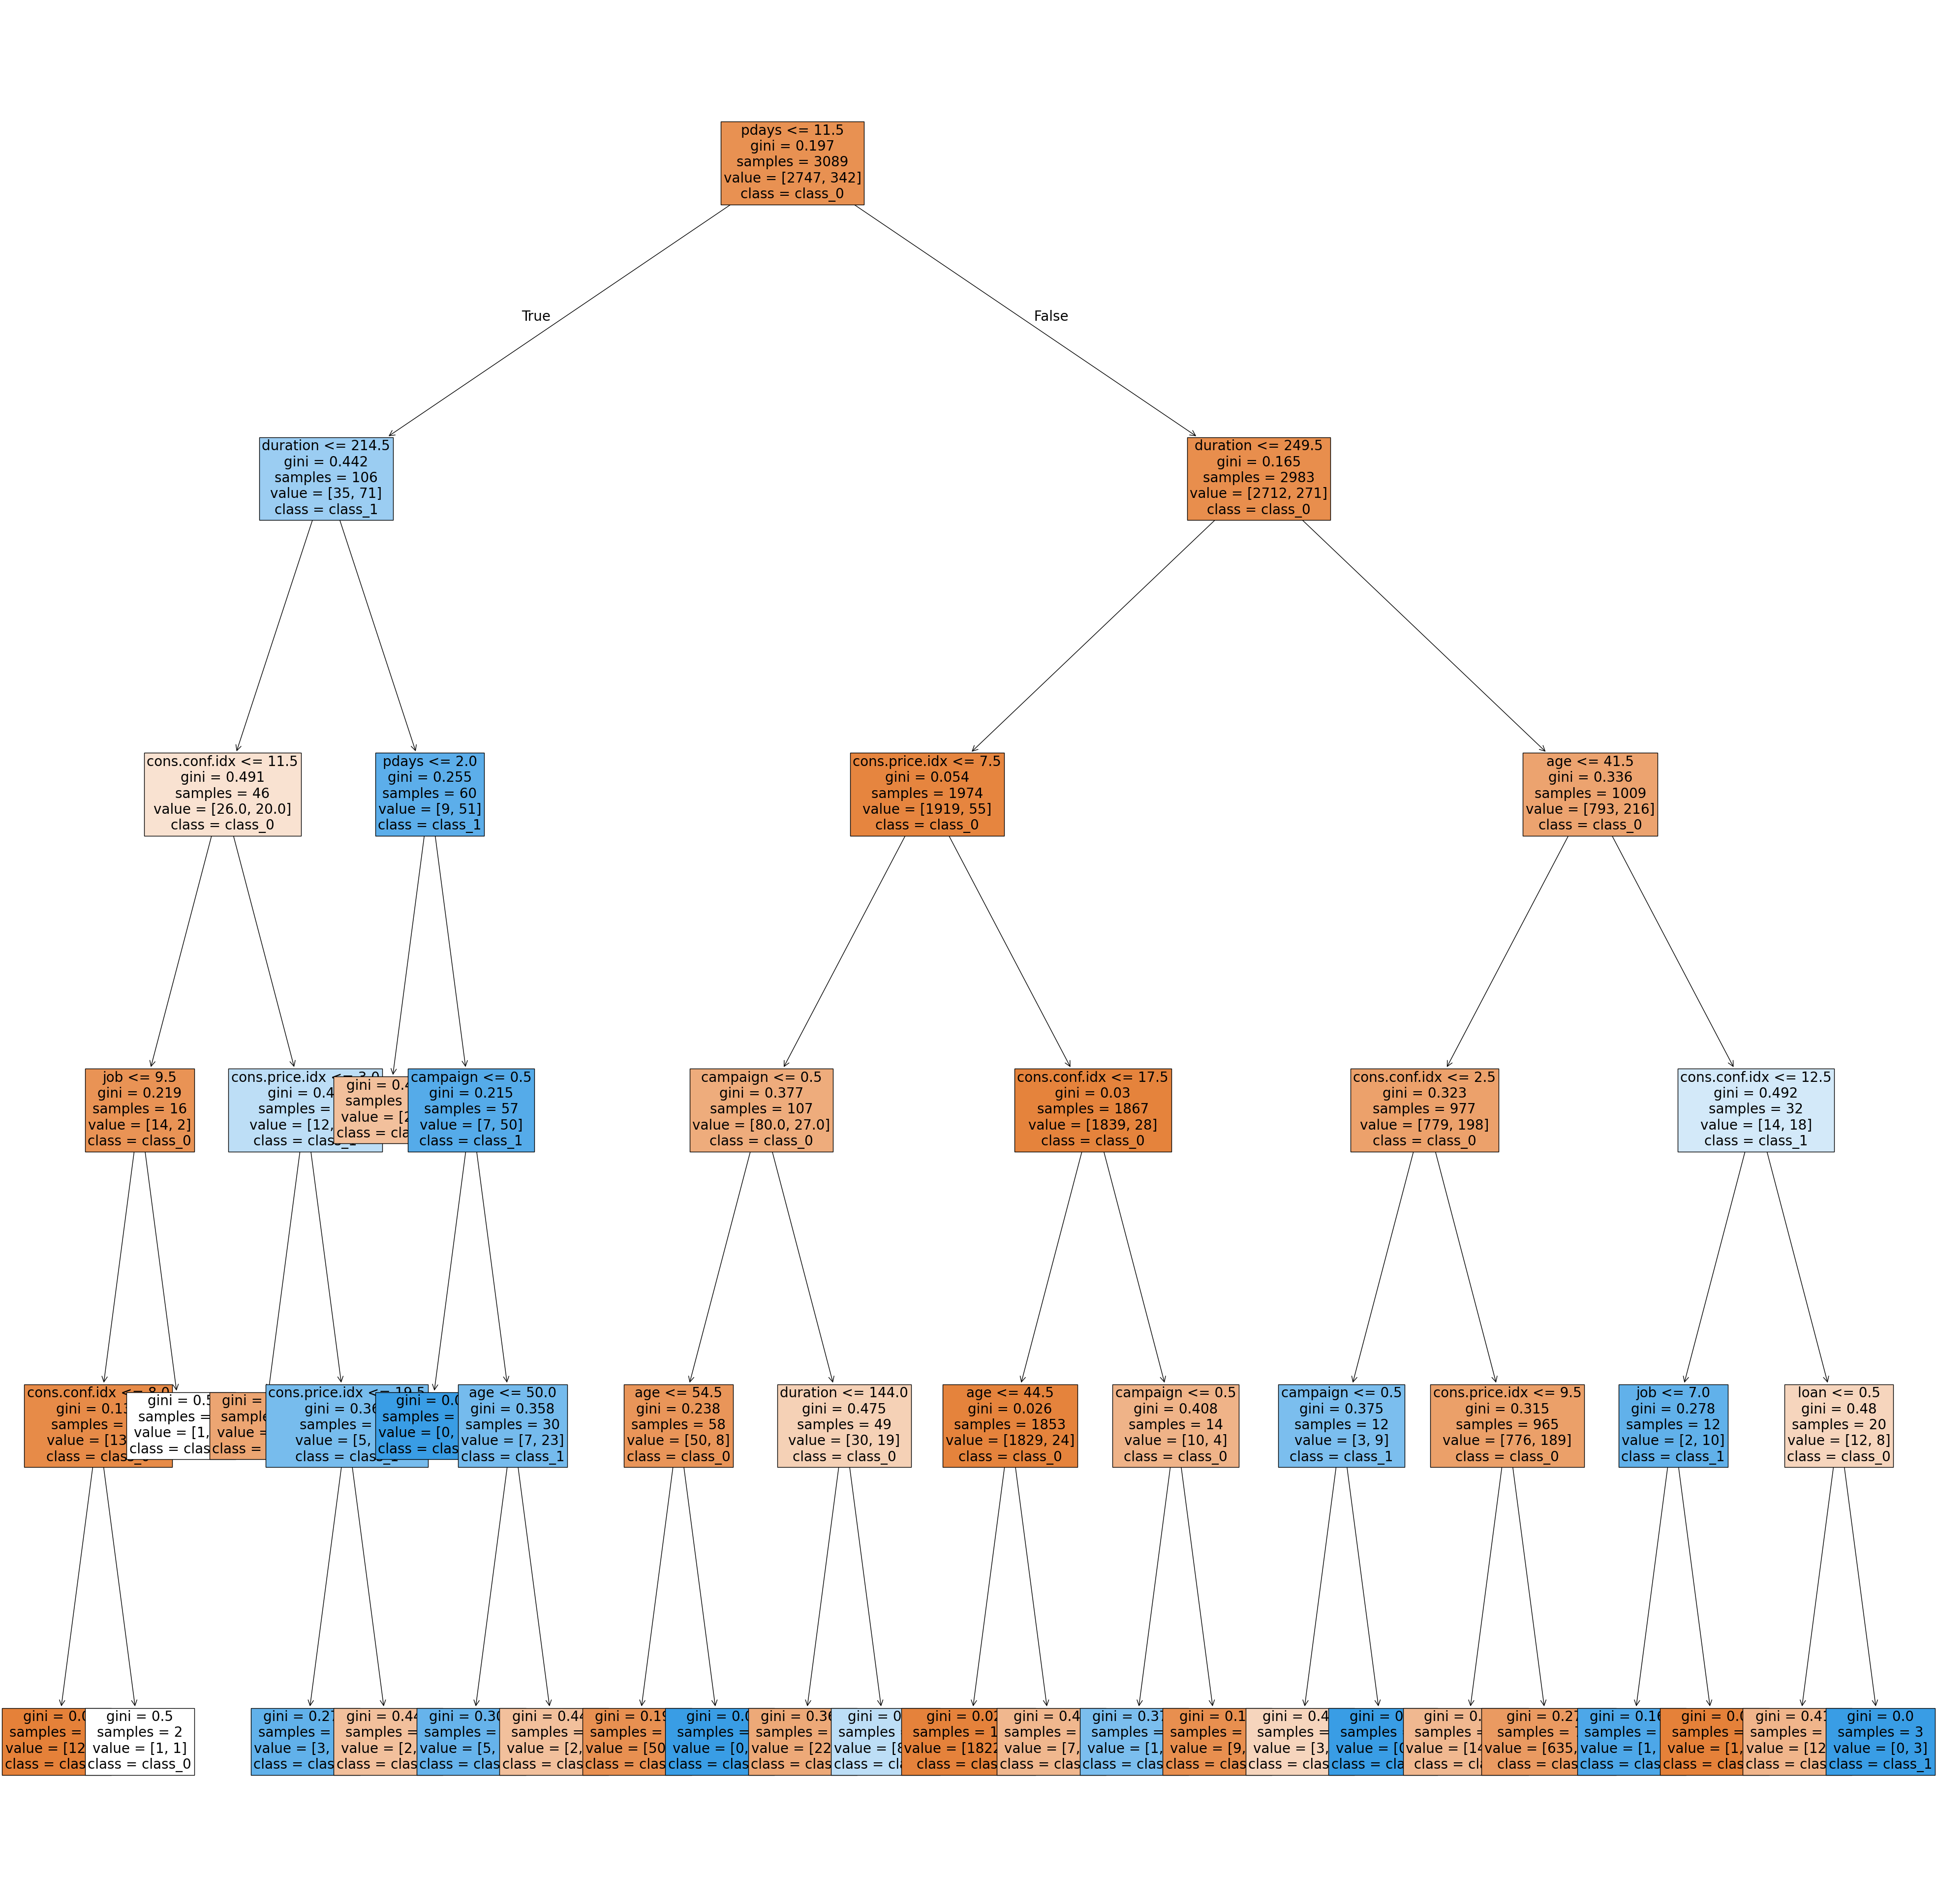

In [113]:
#plotting the decision tree for criterion=gini
feature_n = df.columns.tolist()
class_n = ["class_0","class_1"]
plt.figure(figsize = (50,50))
plot_tree(model_dt,feature_names=feature_n, class_names= class_n, filled=True, fontsize=20)
plt.show()

In [117]:
#DecisionTree for criterion entropy
model_ds = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=15)
model_ds.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [119]:
#Evaluating training and test accuracy
modsc(model_ds)


 Training score/: 0.912916801553901

 Test score: 0.9067961165048544


In [125]:
y_pred_model_ds = model_ds.predict(x_test)
y_pred_model_ds

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
Eval_model(y_pred_model_ds,y_test)

The Accuracy Score is 0.9067961165048544
Confusion Matrix: [[913  88]
 [  8  21]]
The Classification report:              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1001
           1       0.19      0.72      0.30        29

    accuracy                           0.91      1030
   macro avg       0.59      0.82      0.63      1030
weighted avg       0.97      0.91      0.93      1030



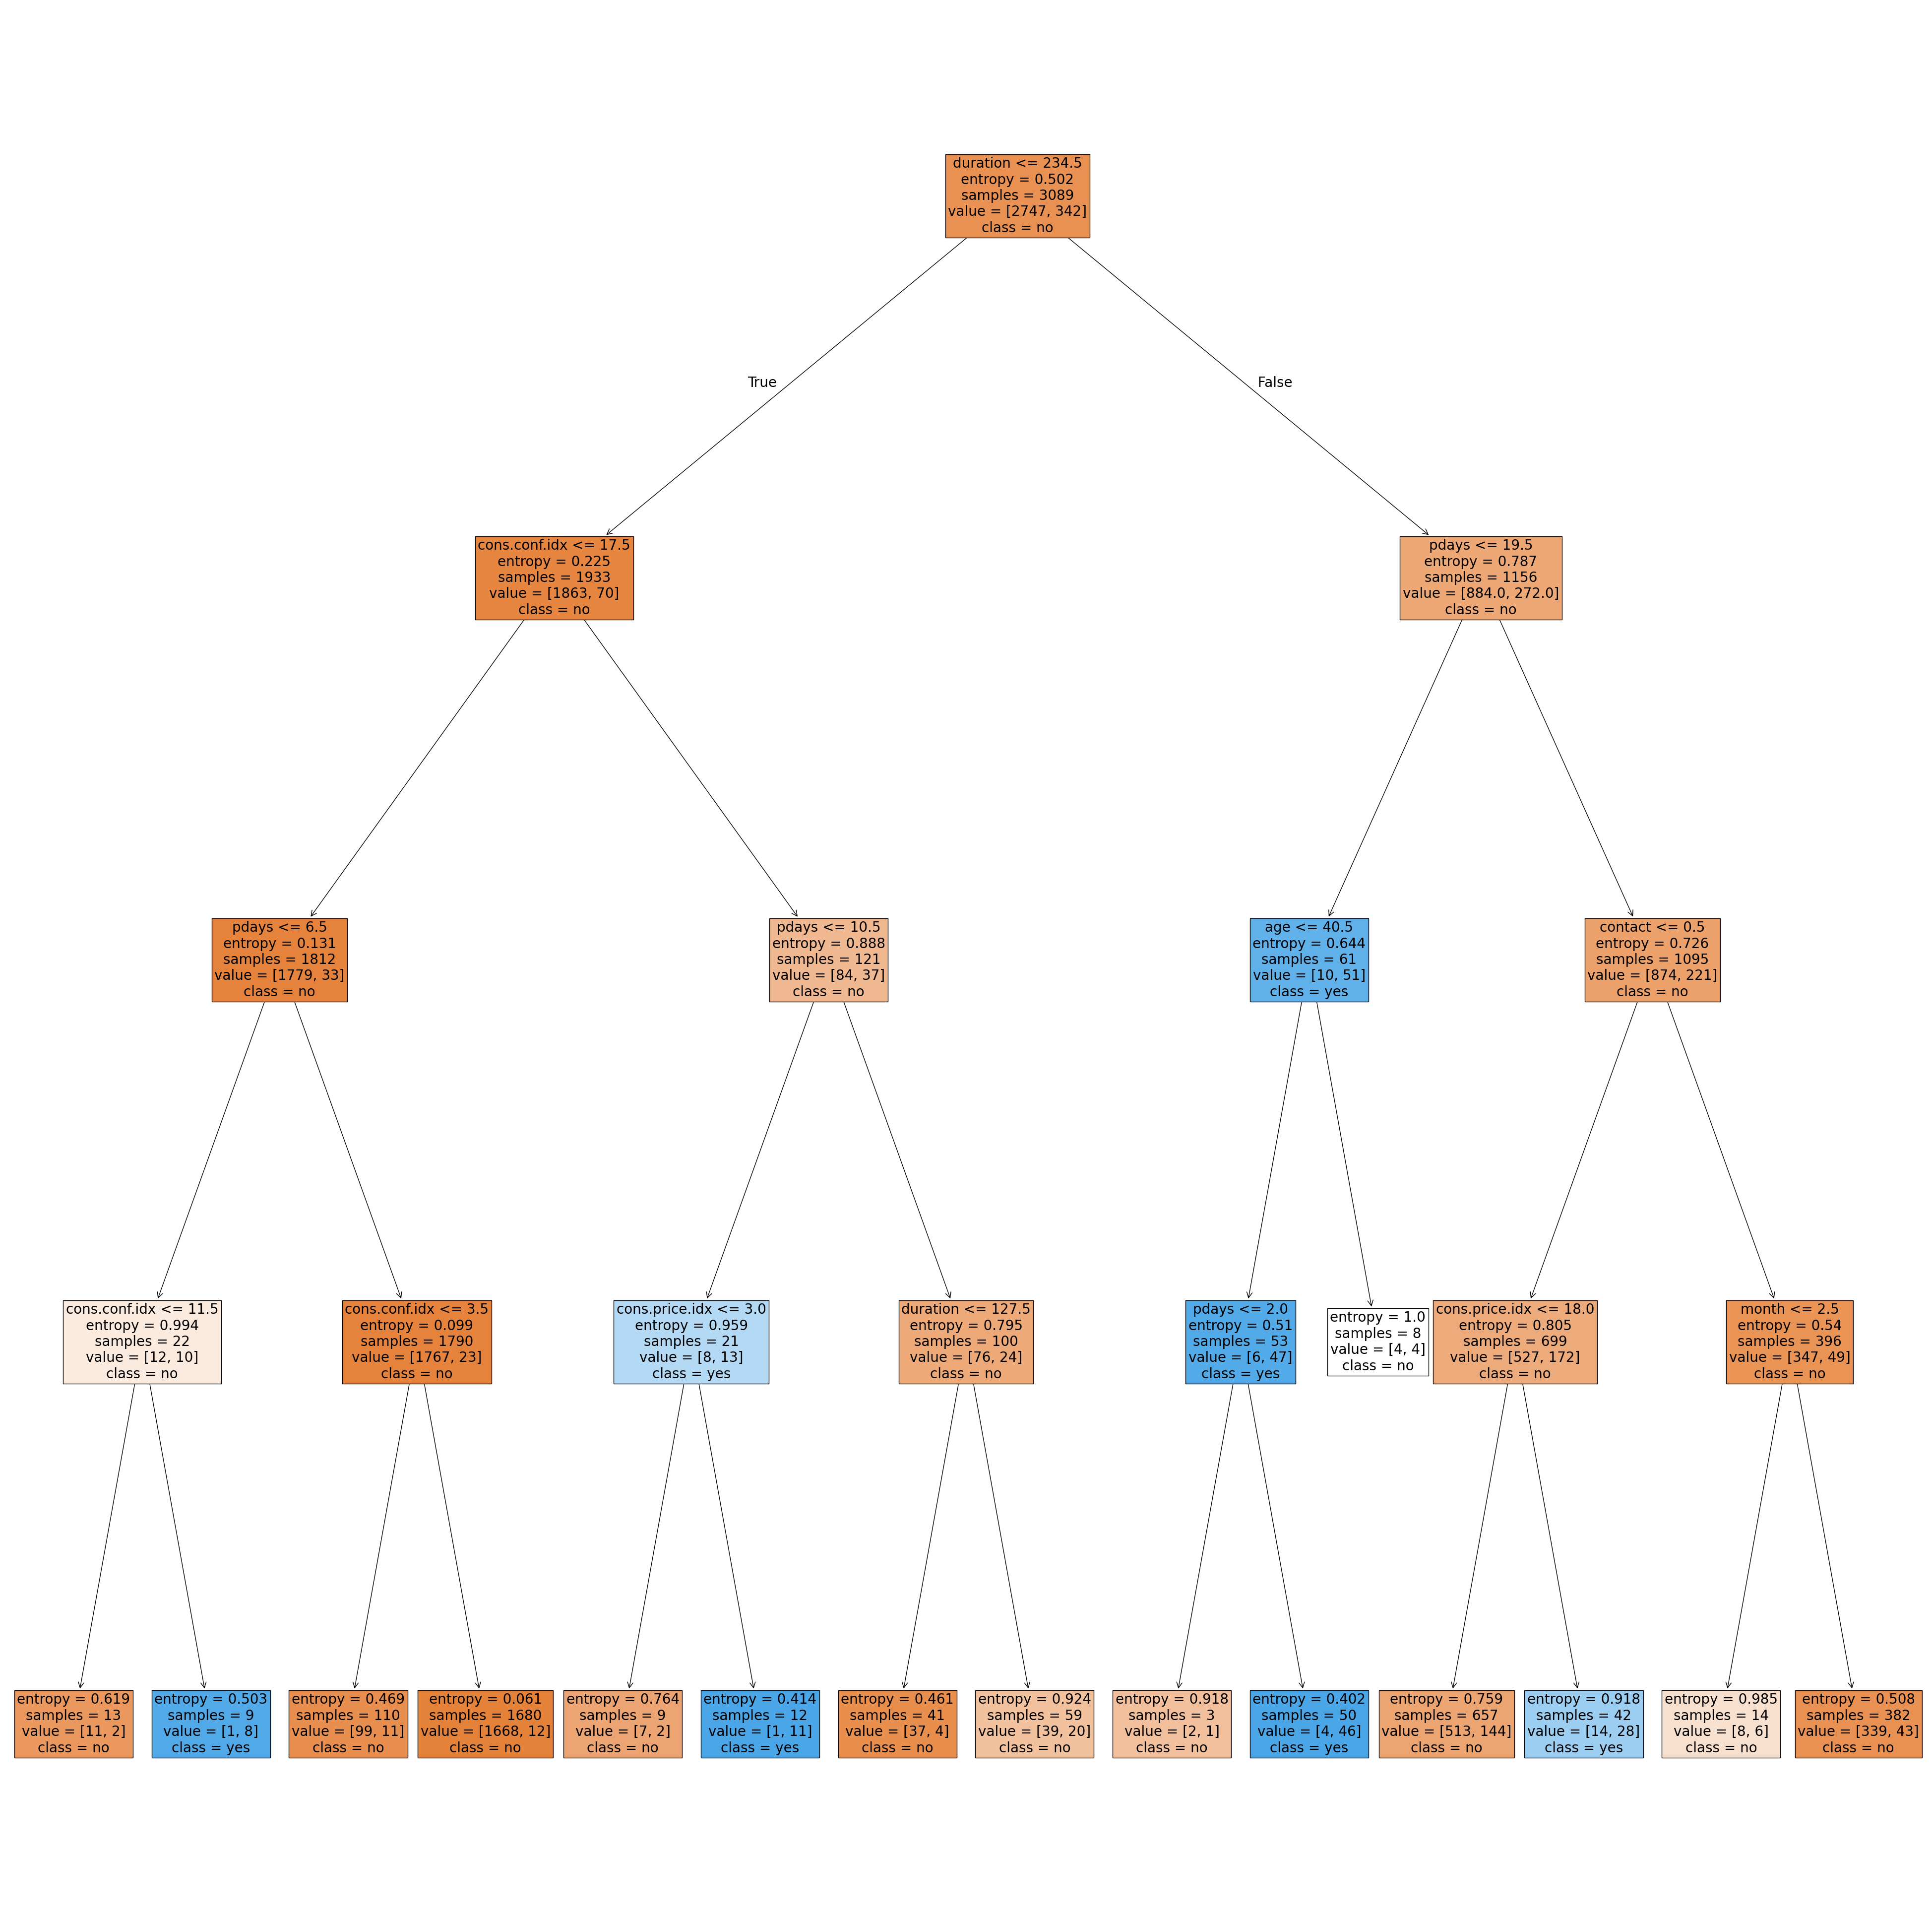

In [131]:
#plotting the decision tree
cn=["no","yes"]
plt.figure(figsize=(50,50))
plot_tree(model_ds, feature_names= x_train.columns.tolist(), class_names= cn, filled=True, fontsize=20)
plt.show()

In [137]:
#printing the models score and accuracy
print("The Evaluation for criterion= gini max_depth=5 min_samples_split=10")
modsc(model_dt)
Eval_model(ypred_model_dt,y_test)

print("The Evaluation for criterion= entropy max_depth=4 min_samples_split=15")
modsc(model_ds)
Eval_model(y_pred_model_ds, y_test)

The Evaluation for criterion= gini max_depth=5 min_samples_split=10

 Training score/: 0.9161540951764325

 Test score: 0.903883495145631
The Accuracy Score is 0.903883495145631
Confusion Matrix: [[911  89]
 [ 10  20]]
The Classification report:              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1000
           1       0.18      0.67      0.29        30

    accuracy                           0.90      1030
   macro avg       0.59      0.79      0.62      1030
weighted avg       0.97      0.90      0.93      1030

The Evaluation for criterion= entropy max_depth=4 min_samples_split=15

 Training score/: 0.912916801553901

 Test score: 0.9067961165048544
The Accuracy Score is 0.9067961165048544
Confusion Matrix: [[913  88]
 [  8  21]]
The Classification report:              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1001
           1       0.19      0.72      0.30        29

    accuracy   